<a href="https://colab.research.google.com/github/64060kbarot/AML_64061/blob/main/AML_Neural_Network_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Assignment 1: Neural Network*
For the IMDB example that we discussed in class, do the following:
1. You used two hidden layers. Try using one or three hidden layers and see how doing so
affects validation and test accuracy.
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so
on.
3. Try using the mse loss function instead of binary_crossentropy.
4. Try using the tanh activation (an activation that was popular in the early days of neural
networks) instead of relu.
5. Use any technique we studied in class, and these include regularization, dropout, etc., to
get your model to perform better on validation.

*Import IMDB data set from the library tensorflow.keras.dataset*

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras
from keras import layers



In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [4]:
#Decoding Reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [6]:
#Vectorised Train & Test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
#Building the Model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [9]:
#Validating your approach : Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
#Training the model with batch size 512 and 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 60ms/step - loss: 0.5446 - accuracy: 0.7693 - val_loss: 0.4177 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3402 - accuracy: 0.8892 - val_loss: 0.3252 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2534 - accuracy: 0.9150 - val_loss: 0.3126 - val_accuracy: 0.8717
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2011 - accuracy: 0.9327 - val_loss: 0.2747 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1692 - accuracy: 0.9447 - val_loss: 0.3023 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1458 - accuracy: 0.9541 - val_loss: 0.2833 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1263 - accuracy: 0.9602 - val_loss: 0.2924 - val_accuracy: 0.8860
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

*Training and Validation loss graph*


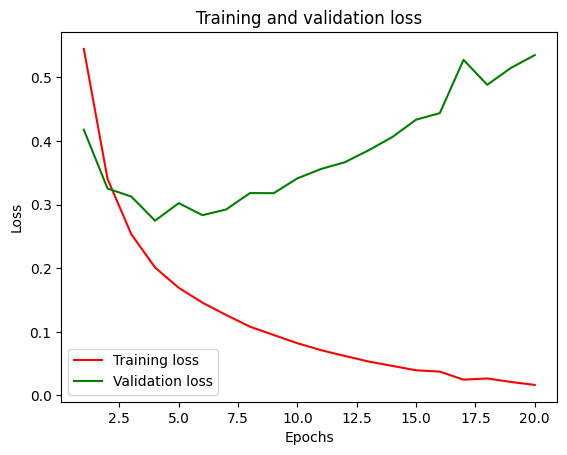

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*Training and Validation Accuracy*

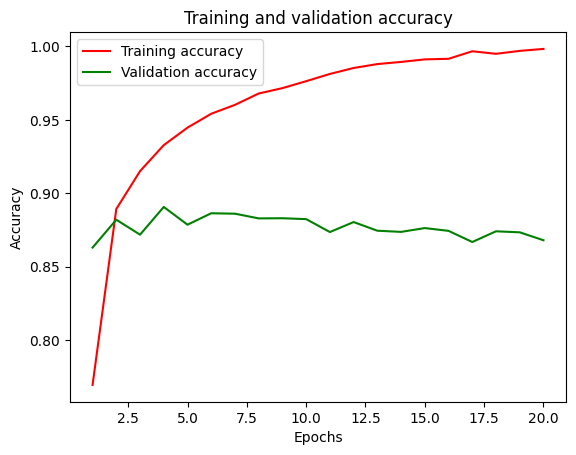

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*Building two different model : Model_10epochs and Model_30epochs*

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 0.4667 - accuracy: 0.8166
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2781 - accuracy: 0.9006
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.2180 - accuracy: 0.9217
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1832 - accuracy: 0.9350
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1612 - accuracy: 0.9431
Epoch 6/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1422 - accuracy: 0.9511
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1279 - accuracy: 0.9569
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1137 - accuracy: 0.9614
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1042 - accuracy: 0.9649
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8676


In [14]:
results

[0.39370468258857727, 0.8676000237464905]

####Using a train model to genereate prediction on new data

In [15]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.0612525 ],
       [0.9998696 ],
       [0.1417703 ],
       ...,
       [0.07992414],
       [0.0120513 ],
       [0.7478347 ]], dtype=float32)

In [16]:
# Install Keras
#!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=30, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/30
49/49 [==============================] - 1s 10ms/step - loss: 0.4764 - accuracy: 0.8090
Epoch 2/30
49/49 [==============================] - 0s 10ms/step - loss: 0.2804 - accuracy: 0.9031
Epoch 3/30
49/49 [==============================] - 0s 10ms/step - loss: 0.2191 - accuracy: 0.9212
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1851 - accuracy: 0.9332
Epoch 5/30
49/49 [==============================] - 0s 10ms/step - loss: 0.1619 - accuracy: 0.9418
Epoch 6/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1463 - accuracy: 0.9470
Epoch 7/30
49/49 [==============================] - 0s 10ms/step - loss: 0.1304 - accuracy: 0.9547
Epoch 8/30
49/49 [==============================] - 0s 9ms/step - loss: 0.1181 - accuracy: 0.9598
Epoch 9/30
49/49 [==============================] - 0s 10ms/step - loss: 0.1067 - accuracy: 0.9634
Epoch 10/30
49/49 [==============================] - 0s 10ms/step - loss: 0.0961 - accuracy: 0.9683
Epoch 11/30


In [17]:
results

[0.897215723991394, 0.8536800146102905]

# ***1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.***

*Model_3layers*

In [18]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5526 - accuracy: 0.7644 - val_loss: 0.4122 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3342 - accuracy: 0.8903 - val_loss: 0.3116 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2377 - accuracy: 0.9206 - val_loss: 0.3194 - val_accuracy: 0.8686
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1896 - accuracy: 0.9353 - val_loss: 0.2973 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1558 - accuracy: 0.9463 - val_loss: 0.2803 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1290 - accuracy: 0.9577 - val_loss: 0.3234 - val_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1076 - accuracy: 0.9669 - val_loss: 0.3870 - val_accuracy: 0.8666
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

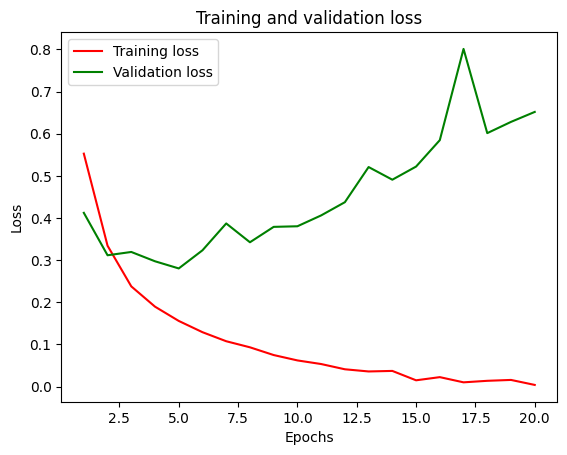

In [19]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

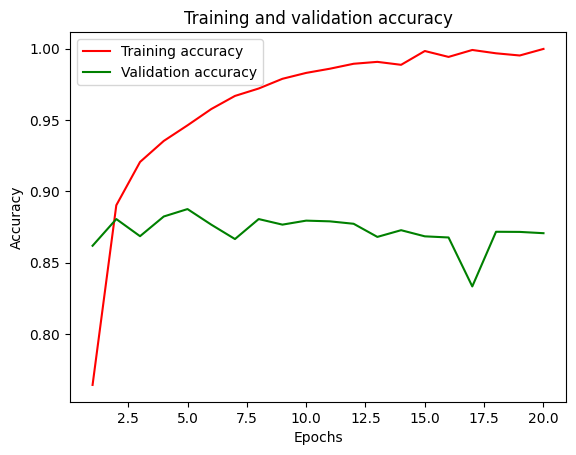

In [20]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model_11.fit(x_train, y_train, epochs=10, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2141 - accuracy: 0.9462
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1216 - accuracy: 0.9632
Epoch 3/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0932 - accuracy: 0.9723
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0682 - accuracy: 0.9804
Epoch 5/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0521 - accuracy: 0.9863
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9895
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0296 - accuracy: 0.9924
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0226 - accuracy: 0.9943
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0187 - accuracy: 0.9951
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8676


[0.39370468258857727, 0.8676000237464905]

*Model_1layers*

In [22]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5060 - accuracy: 0.7980 - val_loss: 0.4016 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3329 - accuracy: 0.8952 - val_loss: 0.3278 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2636 - accuracy: 0.9166 - val_loss: 0.3031 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2231 - accuracy: 0.9275 - val_loss: 0.2882 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1946 - accuracy: 0.9387 - val_loss: 0.2809 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1728 - accuracy: 0.9456 - val_loss: 0.2747 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1551 - accuracy: 0.9521 - val_loss: 0.2781 - val_accuracy: 0.8886
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

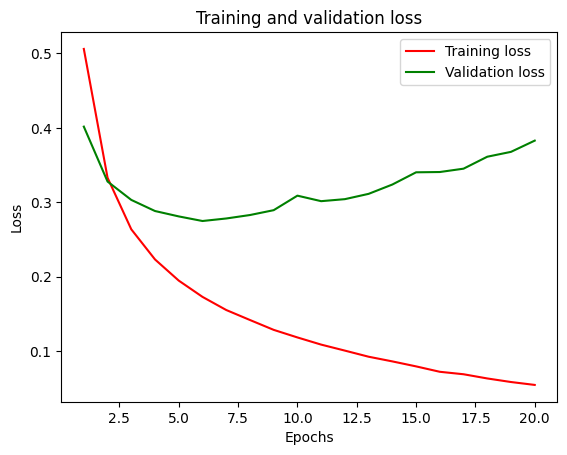

In [23]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

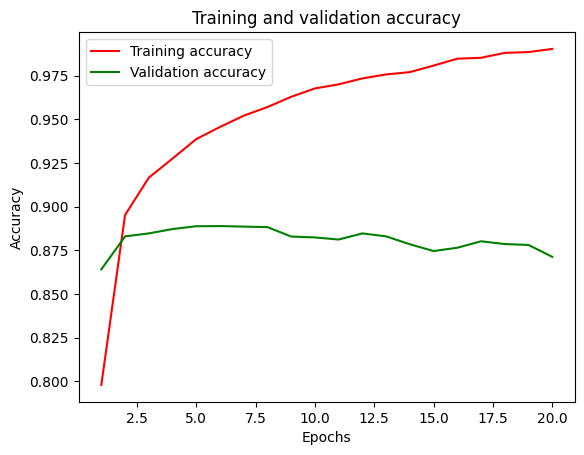

In [24]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model_12.fit(x_train, y_train, epochs=10, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

Epoch 1/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1798 - accuracy: 0.9452
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1453 - accuracy: 0.9546
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1282 - accuracy: 0.9587
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1152 - accuracy: 0.9636
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1045 - accuracy: 0.9686
Epoch 6/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0971 - accuracy: 0.9705
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0889 - accuracy: 0.9733
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0834 - accuracy: 0.9761
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0773 - accuracy: 0.9783
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.3937 - accuracy: 0.8676


[0.39370468258857727, 0.8676000237464905]

# ***2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.***

*Model_32Units*

In [26]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.4977 - accuracy: 0.7765 - val_loss: 0.3514 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2947 - accuracy: 0.8937 - val_loss: 0.3065 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2204 - accuracy: 0.9234 - val_loss: 0.2747 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1725 - accuracy: 0.9409 - val_loss: 0.2867 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1480 - accuracy: 0.9477 - val_loss: 0.3699 - val_accuracy: 0.8616
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1237 - accuracy: 0.9586 - val_loss: 0.2990 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1036 - accuracy: 0.9657 - val_loss: 0.3185 - val_accuracy: 0.8830
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

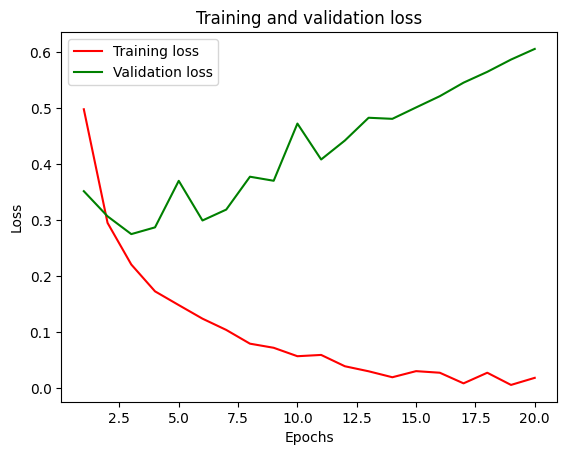

In [27]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

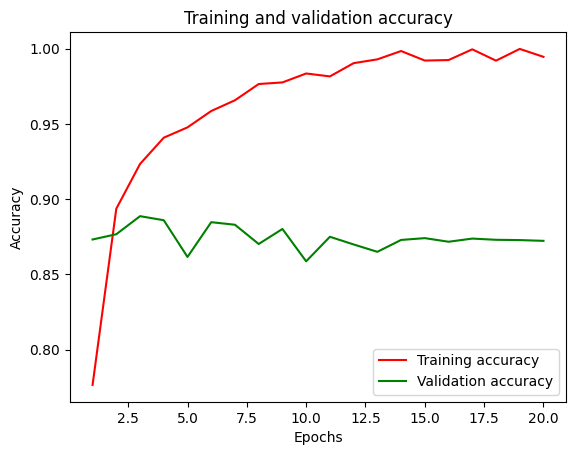

In [28]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model_21.fit(x_train, y_train, epochs=10, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 0.9472
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1121 - accuracy: 0.9651
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0795 - accuracy: 0.9755
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0548 - accuracy: 0.9847
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0420 - accuracy: 0.9885
Epoch 6/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0263 - accuracy: 0.9938
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0197 - accuracy: 0.9956
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0150 - accuracy: 0.9962
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0086 - accuracy: 0.9982
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6836 - accuracy: 0.8633


[0.6836414337158203, 0.8632799983024597]

*Model_64Units*

In [30]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5132 - accuracy: 0.7403 - val_loss: 0.4211 - val_accuracy: 0.8125
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2915 - accuracy: 0.8893 - val_loss: 0.3288 - val_accuracy: 0.8608
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2221 - accuracy: 0.9180 - val_loss: 0.3098 - val_accuracy: 0.8732
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1816 - accuracy: 0.9313 - val_loss: 0.2838 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1611 - accuracy: 0.9379 - val_loss: 0.2884 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1246 - accuracy: 0.9578 - val_loss: 0.3081 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1031 - accuracy: 0.9651 - val_loss: 0.3263 - val_accuracy: 0.8800
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

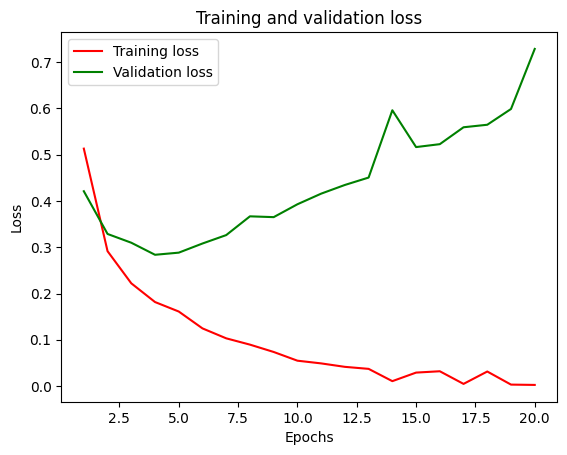

In [31]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

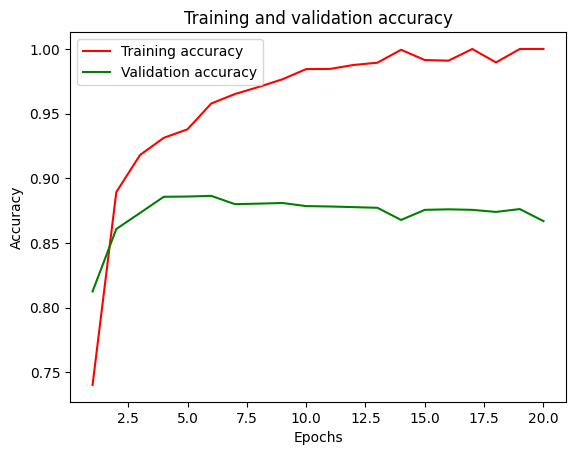

In [32]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model_22.fit(x_train, y_train, epochs=10, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2020 - accuracy: 0.9446
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1042 - accuracy: 0.9668
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0643 - accuracy: 0.9813
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0387 - accuracy: 0.9892
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0254 - accuracy: 0.9934
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0212 - accuracy: 0.9939
Epoch 7/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.9996
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9953
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.7153 - accuracy: 0.8681


[0.7152636647224426, 0.8680800199508667]

*Model_128Units*

In [34]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5225 - accuracy: 0.7355 - val_loss: 0.3750 - val_accuracy: 0.8425
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2986 - accuracy: 0.8787 - val_loss: 0.2794 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2302 - accuracy: 0.9111 - val_loss: 0.3010 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1727 - accuracy: 0.9341 - val_loss: 0.3076 - val_accuracy: 0.8789
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1429 - accuracy: 0.9464 - val_loss: 0.6289 - val_accuracy: 0.7938
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1236 - accuracy: 0.9565 - val_loss: 0.2974 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0809 - accuracy: 0.9748 - val_loss: 0.3170 - val_accuracy: 0.8841
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

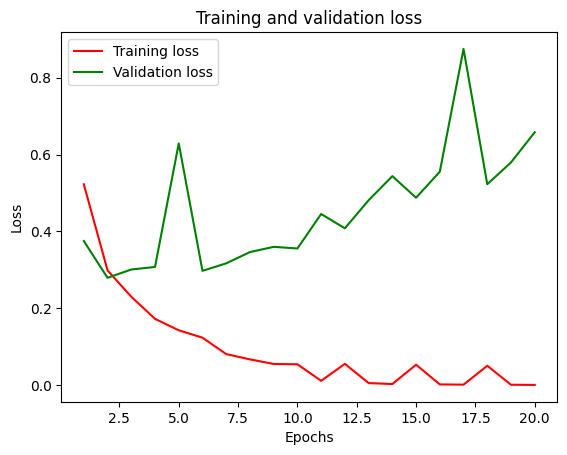

In [35]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

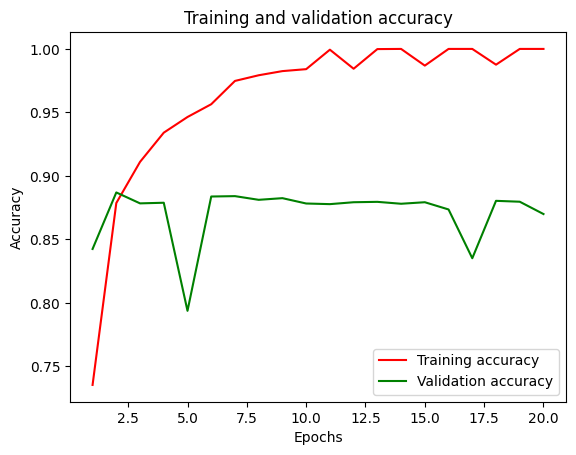

In [36]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
model_23.fit(x_train, y_train, epochs=10, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1755 - accuracy: 0.9470
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0825 - accuracy: 0.9738
Epoch 3/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0240 - accuracy: 0.9936
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 6/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 7/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 9/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6655 - accuracy: 0.8740


[0.6654729843139648, 0.873960018157959]

# ***3.Try using the mse loss function instead of binary_crossentropy.***

In [38]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.1901 - accuracy: 0.7465 - val_loss: 0.1474 - val_accuracy: 0.8133
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1114 - accuracy: 0.8850 - val_loss: 0.1036 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0823 - accuracy: 0.9097 - val_loss: 0.0972 - val_accuracy: 0.8754
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0665 - accuracy: 0.9259 - val_loss: 0.0934 - val_accuracy: 0.8769
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0583 - accuracy: 0.9345 - val_loss: 0.0948 - val_accuracy: 0.8719
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0490 - accuracy: 0.9471 - val_loss: 0.0837 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0432 - accuracy: 0.9558 - val_loss: 0.0882 - val_accuracy: 0.8804
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

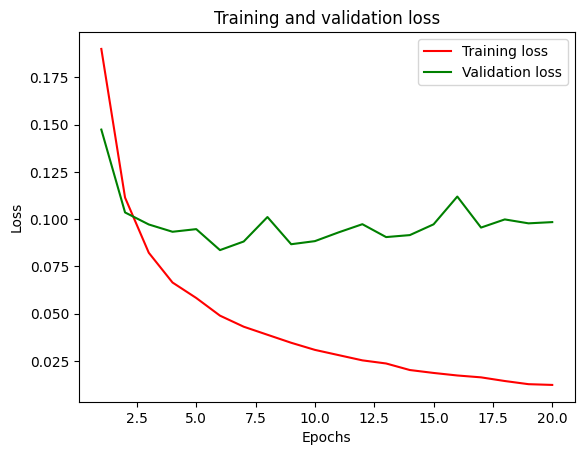

In [39]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

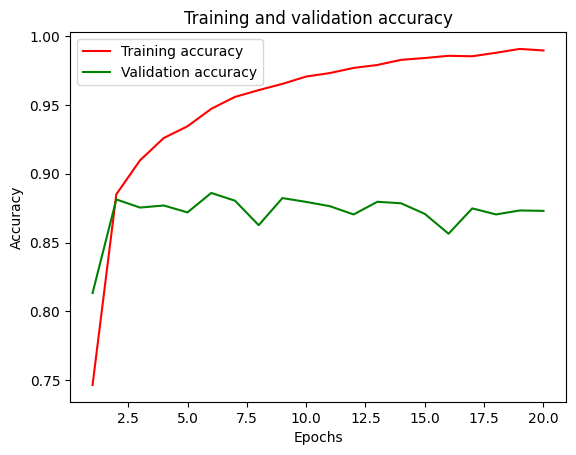

In [40]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
model_MSE.fit(x_train, y_train, epochs=10, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9437
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0388 - accuracy: 0.9552
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0338 - accuracy: 0.9621
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0304 - accuracy: 0.9671
Epoch 5/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9716
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 0.9744
Epoch 7/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.9755
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0214 - accuracy: 0.9787
Epoch 9/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.9814
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1127 - accuracy: 0.8637


[0.11267902702093124, 0.8636800050735474]

# ***4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.***

*Model_Tanh*

In [42]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4872 - accuracy: 0.7917 - val_loss: 0.3608 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2869 - accuracy: 0.9028 - val_loss: 0.3466 - val_accuracy: 0.8524
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2146 - accuracy: 0.9244 - val_loss: 0.2884 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1664 - accuracy: 0.9431 - val_loss: 0.2839 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1311 - accuracy: 0.9565 - val_loss: 0.3364 - val_accuracy: 0.8721
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1084 - accuracy: 0.9633 - val_loss: 0.3251 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0896 - accuracy: 0.9705 - val_loss: 0.3605 - val_accuracy: 0.8747
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

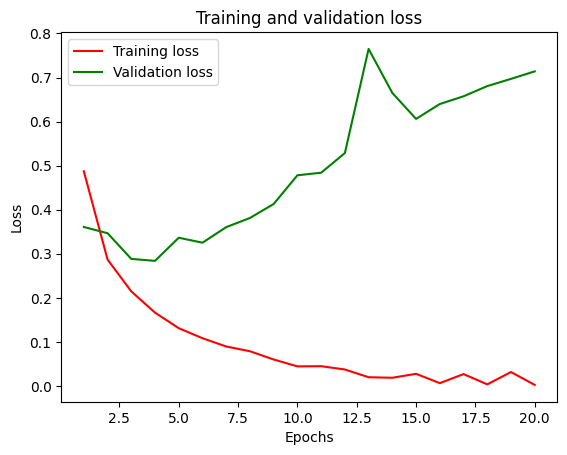

In [43]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

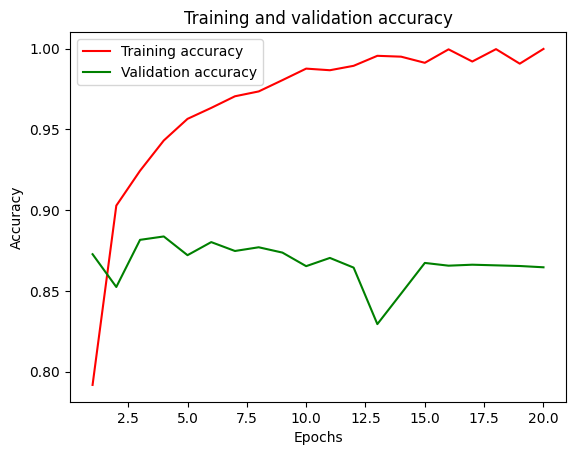

In [44]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
model_tanh.fit(x_train, y_train, epochs=10, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/10
49/49 [==============================] - 0s 9ms/step - loss: 0.2612 - accuracy: 0.9417
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1413 - accuracy: 0.9586
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1178 - accuracy: 0.9616
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0972 - accuracy: 0.9685
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0866 - accuracy: 0.9700
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0731 - accuracy: 0.9768
Epoch 7/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0683 - accuracy: 0.9775
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9800
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6700 - accuracy: 0.8476


[0.6699917316436768, 0.8476399779319763]

# ***5.Use any technique we studied in class, and these include regularization,dropout, etc., to get your model to perform better on validation.***

*Model_L2_regularization*

In [46]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.6400 - accuracy: 0.7583 - val_loss: 0.5219 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4334 - accuracy: 0.8831 - val_loss: 0.4416 - val_accuracy: 0.8545
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3523 - accuracy: 0.9052 - val_loss: 0.3832 - val_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3100 - accuracy: 0.9221 - val_loss: 0.4066 - val_accuracy: 0.8623
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2860 - accuracy: 0.9289 - val_loss: 0.4123 - val_accuracy: 0.8599
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2707 - accuracy: 0.9351 - val_loss: 0.3590 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2552 - accuracy: 0.9430 - val_loss: 0.3617 - val_accuracy: 0.8836
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

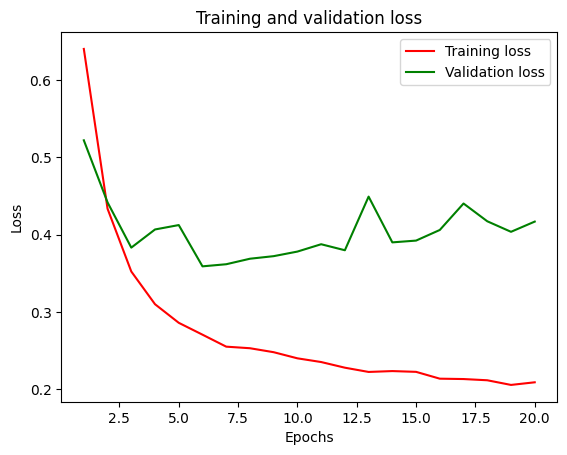

In [47]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

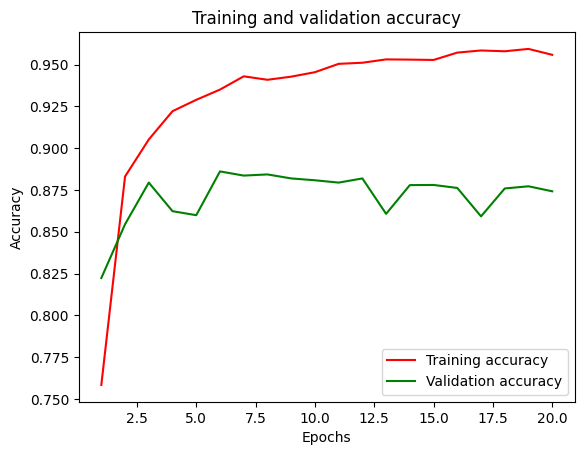

In [48]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
model_regularisation.fit(x_train, y_train, epochs=10, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2892 - accuracy: 0.9234
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.2603 - accuracy: 0.9325
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2541 - accuracy: 0.9350
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2427 - accuracy: 0.9392
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2497 - accuracy: 0.9346
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2414 - accuracy: 0.9387
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2421 - accuracy: 0.9365
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2397 - accuracy: 0.9386
Epoch 9/10
49/49 [==============================] - 0s 10ms/step - loss: 0.2400 - accuracy: 0.9386
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.5028 - accuracy: 0.8402


[0.5028179883956909, 0.8402000069618225]

*Model_Dropout*

In [50]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5703 - accuracy: 0.7181 - val_loss: 0.4357 - val_accuracy: 0.8488
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3972 - accuracy: 0.8566 - val_loss: 0.3530 - val_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3108 - accuracy: 0.8927 - val_loss: 0.2982 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2507 - accuracy: 0.9111 - val_loss: 0.2786 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2149 - accuracy: 0.9272 - val_loss: 0.2798 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1782 - accuracy: 0.9413 - val_loss: 0.2807 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1519 - accuracy: 0.9529 - val_loss: 0.2908 - val_accuracy: 0.8862
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

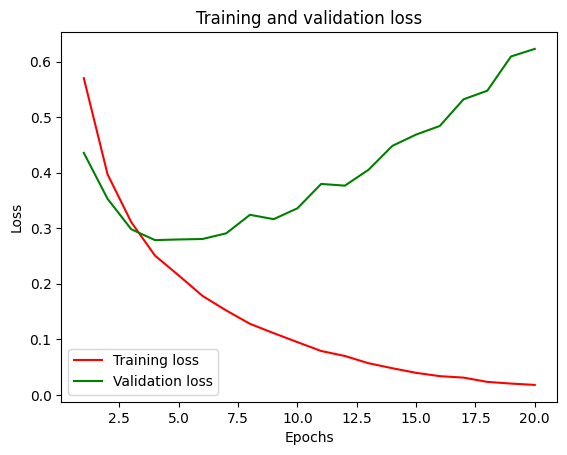

In [51]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

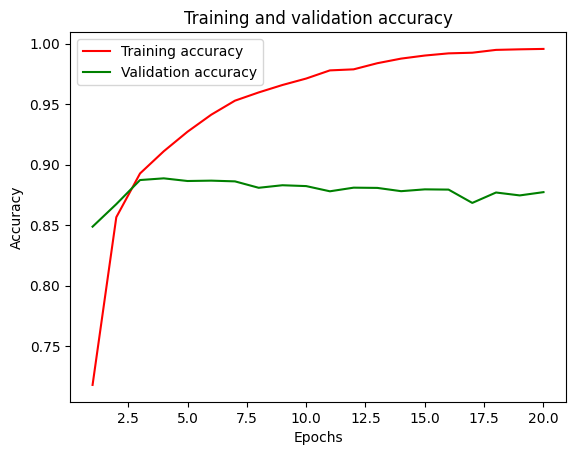

In [52]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
model_Dropout.fit(x_train, y_train, epochs=10, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1863 - accuracy: 0.9463
Epoch 2/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1344 - accuracy: 0.9601
Epoch 3/10
49/49 [==============================] - 0s 9ms/step - loss: 0.1062 - accuracy: 0.9682
Epoch 4/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0850 - accuracy: 0.9751
Epoch 5/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0721 - accuracy: 0.9776
Epoch 6/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0564 - accuracy: 0.9840
Epoch 7/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0516 - accuracy: 0.9846
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0439 - accuracy: 0.9866
Epoch 9/10
49/49 [==============================] - 0s 9ms/step - loss: 0.0378 - accuracy: 0.9881
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.7059 - accuracy: 0.8662


[0.7059060335159302, 0.866159975528717]

*Training the model with Hypertunned Parameters mentioned above*

In [64]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.1),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0002)),
    layers.Dropout(0.1),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.2334 - accuracy: 0.7153 - val_loss: 0.1614 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1526 - accuracy: 0.8618 - val_loss: 0.1366 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1286 - accuracy: 0.8929 - val_loss: 0.1257 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1103 - accuracy: 0.9137 - val_loss: 0.1319 - val_accuracy: 0.8762
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1010 - accuracy: 0.9246 - val_loss: 0.1239 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0885 - accuracy: 0.9409 - val_loss: 0.1345 - val_accuracy: 0.8705
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0841 - accuracy: 0.9455 - val_loss: 0.1271 - val_accuracy: 0.8772
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

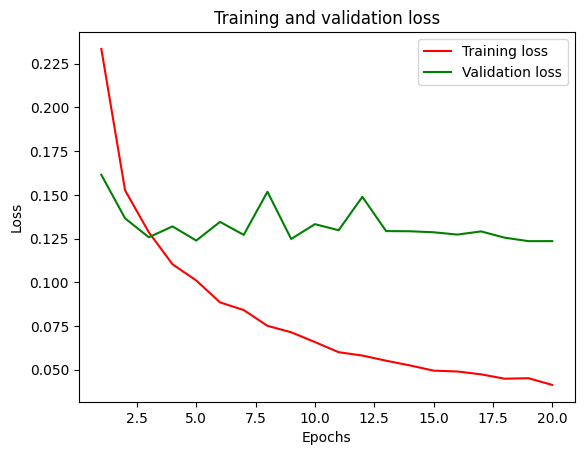

In [65]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r-", label="Training loss")  # Red solid line
plt.plot(epochs, val_loss_values, "g-", label="Validation loss") # Green solid line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

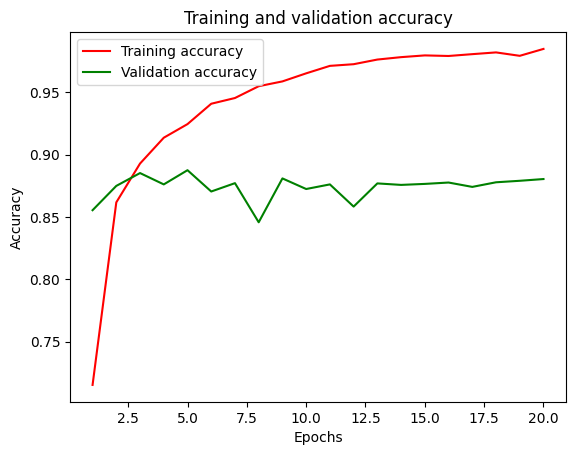

In [66]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "r-", label="Training accuracy")
plt.plot(epochs, val_acc, "g-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
model_Hyper.fit(x_train, y_train, epochs=10, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0740 - accuracy: 0.9406
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0621 - accuracy: 0.9567
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0554 - accuracy: 0.9647
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0492 - accuracy: 0.9716
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0438 - accuracy: 0.9785
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0452 - accuracy: 0.9750
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.0392 - accuracy: 0.9821
Epoch 8/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0420 - accuracy: 0.9769
Epoch 9/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0369 - accuracy: 0.9834
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.1143 - accuracy: 0.8776


[0.11432741582393646, 0.8776000142097473]

# ***Summary***



In [72]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_M23[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_M23[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_3Layer','Model_1Layer','Model_32units','Model_64units','Model_128units','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hypertune']
plt.clf()

<Figure size 640x480 with 0 Axes>

In [78]:
!pip install numpy

In [80]:
import numpy as np
import pandas as pd
from IPython.display import display

All_Loss = np.array([results_M11[0], results_M12[0], results_M21[0], results_M22[0], results_M23[0], results_MSE[0], results_tanh[0], results_regularisation[0], results_Dropout[0], results_Hyper[0]]) * 100
All_Accuracy = np.array([results_M11[1], results_M12[1], results_M21[1], results_M22[1], results_M23[1], results_MSE[1], results_tanh[1], results_regularisation[1], results_Dropout[1], results_Hyper[1]]) * 100
Labels = ['Model_3Layer', 'Model_1Layer', 'Model_32units', 'Model_64units', 'Model_128units', 'Model_MSE', 'model_tanh', 'model_regularisation', 'Model_Dropout', 'Model_Hypertune']

# Create a DataFrame
df = pd.DataFrame({
    'Model': Labels,
    'Loss (%)': All_Loss,
    'Accuracy (%)': All_Accuracy
})

# Find the row with the highest accuracy
max_accuracy_index = df['Accuracy (%)'].idxmax()

# Highlight the row with the highest accuracy
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight function
df_styled = df.style.apply(highlight_max, subset=['Accuracy (%)'])

# Display the styled DataFrame
display(df_styled)


,Model,Loss (%),Accuracy (%)
0,Model_3Layer,39.370468,86.760002
1,Model_1Layer,39.370468,86.760002
2,Model_32units,68.364143,86.328000
3,Model_64units,71.526366,86.808002
4,Model_128units,66.547298,87.396002
5,Model_MSE,11.267903,86.368001
6,model_tanh,66.999173,84.763998
7,model_regularisation,50.281799,84.020001
8,Model_Dropout,70.590603,86.615998
9,Model_Hypertune,11.432742,87.760001


***Comparing all models using graph***

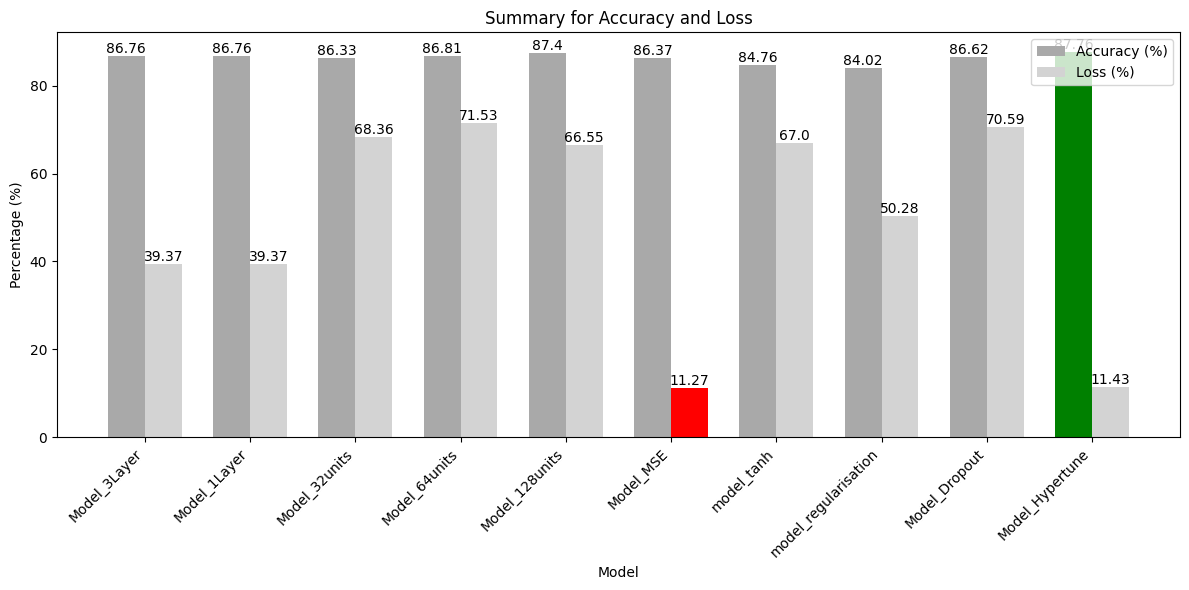

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results_M11, results_M12, etc. are defined elsewhere in your code
All_Loss = np.array([results_M11[0], results_M12[0], results_M21[0], results_M22[0], results_M23[0], results_MSE[0], results_tanh[0], results_regularisation[0], results_Dropout[0], results_Hyper[0]]) * 100
All_Accuracy = np.array([results_M11[1], results_M12[1], results_M21[1], results_M22[1], results_M23[1], results_MSE[1], results_tanh[1], results_regularisation[1], results_Dropout[1], results_Hyper[1]]) * 100
Labels = ['Model_3Layer', 'Model_1Layer', 'Model_32units', 'Model_64units', 'Model_128units', 'Model_MSE', 'model_tanh', 'model_regularisation', 'Model_Dropout', 'Model_Hypertune']

# Create a DataFrame
df = pd.DataFrame({
    'Model': Labels,
    'Loss (%)': All_Loss,
    'Accuracy (%)': All_Accuracy
})

# Find the indices of the highest accuracy and lowest loss
max_accuracy_index = df['Accuracy (%)'].idxmax()
min_loss_index = df['Loss (%)'].idxmin()

# Create a grouped bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Set colors: dark gray for accuracy, light gray for loss, red for lowest loss, green for highest accuracy
colors_accuracy = ['darkgray'] * len(df)
colors_loss = ['lightgray'] * len(df)
colors_accuracy[max_accuracy_index] = 'green'
colors_loss[min_loss_index] = 'red'

# Plot the bars
bar_width = 0.35
index = np.arange(len(df))

bars1 = ax.bar(index, df['Accuracy (%)'], bar_width, label='Accuracy (%)', color=colors_accuracy)
bars2 = ax.bar(index + bar_width, df['Loss (%)'], bar_width, label='Loss (%)', color=colors_loss)

# Annotate the bars with the accuracy and loss values
for bar, accuracy in zip(bars1, df['Accuracy (%)']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(accuracy, 2), va='bottom', ha='center')  # va: vertical alignment

for bar, loss in zip(bars2, df['Loss (%)']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(loss, 2), va='bottom', ha='center')  # va: vertical alignment

# Add labels and title
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Percentage (%)")
plt.xlabel("Model")
plt.xticks(index + bar_width / 2, df['Model'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# ***Explaination***

Below are the Model description for comparision:
*  **Model_11**(Changed to 3 layers)
*  **Model_12**(Changed to 1 layer)
*  **Model_21**(Chnaged to 32 units of hidden layers)
*  **Model_22**(Chnaged to 64 units of hidden layers)
*  **Model_23**(Chnaged to 128 units of hidden layers)
*  **Model_MSE**(Used MSE loss function)
*  **Model_tanh**(Used tanh activation function)
*  **Model_Regularisation**(L2 regularization with a coefficient of 0.0001 for all your hidden layers)
*  **Model_Dropout**(dropout with a rate of 0.5 after each of the hidden layers)
*  **Model_Hyper**(used all the chnages in one)

**Model Compilation:** The binary cross-entropy loss function is well-suited for evaluating the performance of classification models, where the output represents probabilities between 0 and 1. In contrast, mean squared error (MSE) is commonly used in regression tasks, quantifying how closely a regression line aligns with a set of data points. Squaring the differences between data points and the regression line is essential to ensure that negative discrepancies do not cancel out positive ones.

**From the graphical analysis**, it becomes evident that the highest accuracy and the lowest loss were achieved using the "Model_Hyper." This model employs three deep layers (32, 32, 16) with a dropout rate of 0.5 for each layer. In terms of comparing the MSE loss to other models (excluding the final hypertuned model), it's notable that MSE resulted in minimal loss.

**Units:** As we increase the number of units from 16 to 32, 64, and 128, the accuracy experiences only marginal improvements, while the loss function steadily decreases.

**Hidden Layers:** Interestingly, increasing the number of hidden layers from 1 to 3 had no impact on the loss function, accuracy, or performance.

**Loss Function:** When we employ "mse" as the loss function for the IMDB dataset, the resultant loss value is significantly lower compared to binary cross-entropy, signifying improved convergence.

**Activation Function:** The model's use of the tanh activation function results in lower accuracy, primarily due to issues related to the vanishing gradient problem.

**Regularization:** Contrary to the expected outcome, regularization resulted in a higher loss and decreased accuracy compared to the original model. This observation is somewhat counterintuitive since regularization is typically employed to mitigate overfitting and improve model generalization.

**Dropout:** Dropout regularization also contributes to a diminished loss function but doesn't seem to impact accuracy significantly.